In [69]:
# Importar las bibliotecas necesarias

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar gráficos en línea para Jupyter Notebook
%matplotlib inline

# Cargar los datos
df = pd.read_csv('ecommerce_data.csv')

# Mostrar las primeras filas de los datos para verificar la estructura
df.head()

,TimeOnPage,PagesViewed,ProductsViewed,AddedToCart,TrafficSource,Purchase
0,14,13,9,8,Ads,0
1,31,10,14,8,Email,0
2,3,3,23,5,Organic,1
3,34,2,47,2,Referral,0
4,1,5,46,7,Ads,0


In [70]:
# Revisar información general del conjunto de datos
df.info()

 # Sustituir valores nulos con la media, si es necesario
# Convertir la columna categórica 'TrafficSource' a valores numéricos
df['TrafficSource'] = LabelEncoder().fit_transform(df['TrafficSource'])

# Separar las características (X) y la variable objetivo (y)
X = df.drop('Purchase', axis=1)
y = df['Purchase']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características para mejorar el rendimiento del modelo SVM
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TimeOnPage      6999 non-null   int64 
 1   PagesViewed     6999 non-null   int64 
 2   ProductsViewed  6999 non-null   int64 
 3   AddedToCart     6999 non-null   int64 
 4   TrafficSource   6999 non-null   object
 5   Purchase        6999 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 328.2+ KB


In [ ]:
# Crear el modelo SVM con kernel RBF
svm_model = SVC(kernel="rbf", C=1.0, gamma='scale', random_state=42)

# Entrenar el modelo
svm_model.fit(X_train, y_train)

SVC()

In [72]:
# Realizar predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:\n", conf_matrix)

# Reporte de Clasificación
classification_rep = classification_report(y_test, y_pred)
print("\nReporte de Clasificación:\n", classification_rep)

Exactitud del modelo: 0.8478571428571429

Matriz de Confusión:
 [[1155   31]
 [ 182   32]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.86      0.97      0.92      1186
           1       0.51      0.15      0.23       214

    accuracy                           0.85      1400
   macro avg       0.69      0.56      0.57      1400
weighted avg       0.81      0.85      0.81      1400



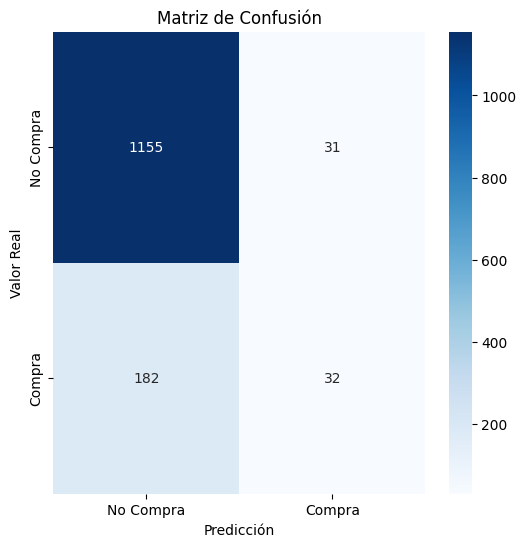

In [73]:
# Visualización de la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Compra', 'Compra'], yticklabels=['No Compra', 'Compra'])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()